In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

Definimos el dataframe a partir del archivo csv que obtuvimos mediante webscrapping:

In [2]:
df_games = pd.read_csv("datos_metacritic.csv")
df_games

,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,The Legend of Zelda: Ocarina of Time,99,9.1,Nintendo 64,Nintendo,"Nov 23, 1998",Action Adventure,"As a young boy, Link is tricked by Ganondorf, ...",1 Player,E
1,Tony Hawk's Pro Skater 2,98,7.4,PlayStation,Activision,"Sep 20, 2000",Sports,As most major publishers' development efforts ...,1-2,T
2,Grand Theft Auto IV,98,7.8,PlayStation 3,Rockstar Games,"Apr 29, 2008",Action Adventure,[Metacritic's 2008 PS3 Game of the Year; Also ...,1 Player,M
3,SoulCalibur,98,8.4,Dreamcast,Namco,"Sep 8, 1999",Action,"This is a tale of souls and swords, transcendi...",1-2,T
4,Grand Theft Auto IV,98,8.0,Xbox 360,Rockstar Games,"Apr 29, 2008",Action Adventure,[Metacritic's 2008 Xbox 360 Game of the Year; ...,1 Player,M
...,...,...,...,...,...,...,...,...,...,...
9937,Vroom in the Night Sky,17,3.2,Switch,Poisoft,"Apr 5, 2017",Sports,Vroom in the night sky is a magical bike actio...,No Online Multiplayer,E
9938,Leisure Suit Larry: Box Office Bust,17,1.9,PlayStation 3,Funsta,"May 5, 2009",Action Adventure,The Leisure Suit Larry: Box Office Bust video ...,No Online Multiplayer,M
9939,Yaris,17,4.4,Xbox 360,Backbone Entertainment,"Oct 10, 2007",Driving,[Xbox Live Arcade] Hop into a Toyota Yaris an...,2 Online,E10+
9940,Ride to Hell: Retribution,16,1.4,PC,Deep Silver,"Jun 24, 2013",Driving,The game is set in the last years of the roari...,2 Online,M


Eliminamos datos inconsistentes

In [3]:
df_games = df_games[df_games["Fecha"]!= "TBA - Early Access"] #eliminamos valor erroneo de fecha
df_games = df_games[df_games["Rating_Meta"]!= 'tbd'] #Valores no utiles en el analisis
df_games = df_games[df_games["Rating_Usuarios"]!= 'tbd']

Definimos el segundo dataframe a utilizar (Agrega las unidades vendidas de cada juego):

In [4]:
df_sales = pd.read_csv("vgsales.csv")
df_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Unimos los dataframes por los nombres de los videojuegos y eliminamos las columnas repetidas

In [5]:
df_rank_sales = df_sales.merge(df_games, left_on="Name", right_on="Nombre", how="inner")
df_rank_sales.drop(columns=["Rank", "Name", "Platform", "Genre", "Publisher"], inplace=True)
df_rank_sales

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,2009.0,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort,80,8.3,Wii,Nintendo,"Jul 26, 2009",Sports,Wii Sports Resort is a collection of fun sport...,No Online Multiplayer,E
1,1989.0,23.20,2.26,4.22,0.58,30.26,Tetris,80,7.3,PlayStation 3,Electronic Arts,"Jan 4, 2011",Miscellaneous,The first Tetris game for the PlayStation 3 wi...,4 Online,E
2,1988.0,2.97,0.69,1.81,0.11,5.58,Tetris,80,7.3,PlayStation 3,Electronic Arts,"Jan 4, 2011",Miscellaneous,The first Tetris game for the PlayStation 3 wi...,4 Online,E
3,2005.0,9.81,7.57,4.13,1.92,23.42,Mario Kart DS,91,8.7,DS,Nintendo,"Nov 14, 2005",Driving,Race and battle with up to eight karts at once...,No Online Multiplayer,E
4,2007.0,8.94,8.03,3.60,2.15,22.72,Wii Fit,80,7.7,Wii,Nintendo,"May 19, 2008",Sports,The active-play phenomenon started by Wii Spor...,1 Player,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8874,2009.0,0.00,0.01,0.00,0.00,0.01,Spore Galactic Adventures,70,7.3,PC,Electronic Arts,"Aug 27, 2008",Strategy,Spore Galactic Adventures adds variety and dep...,No Online Multiplayer,E10+
8875,2002.0,0.01,0.00,0.00,0.00,0.01,Super Robot Taisen: Original Generation,72,6.7,Game Boy Advance,Atlus Co.,"Aug 8, 2006",Strategy,Super Robot Taisen: Original Generation is a s...,1 Player,T
8876,2015.0,0.00,0.01,0.00,0.00,0.01,Teslagrad,81,8.0,Switch,Soedesco,"Dec 7, 2017",Action,"Teslagrad is a 2D puzzle-platformer, where you...",No Online Multiplayer,E
8877,2015.0,0.00,0.01,0.00,0.00,0.01,Teslagrad,77,7.8,PC,Rain Games,"Dec 13, 2013",Action,"Teslagrad is a 2D puzzle-platformer, where you...",No Online Multiplayer,E


Verficamos duplicados y nulos

In [6]:
dup = df_rank_sales.duplicated().sum()
print(f"Hay {dup} duplicados \n \nnulos:")
df_rank_sales.isnull().sum()

Hay 21 duplicados 
 
nulos:


Year               194
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Nombre               0
Rating_Meta          0
Rating_Usuarios      0
Plataforma           0
Developer            0
Fecha                0
Genero               0
Resumen              0
N_jugadores          9
Clasificacion        0
dtype: int64

Eliminamos duplicados y nulos

In [7]:
df_rank_sales.drop_duplicates(inplace=True)
df_rank_sales.dropna(inplace=True)

In [8]:
dup = df_rank_sales.duplicated().sum()
print(f"Hay {dup} duplicados \n \nnulos:")
df_rank_sales.isnull().sum()

Hay 0 duplicados 
 
nulos:


Year               0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Nombre             0
Rating_Meta        0
Rating_Usuarios    0
Plataforma         0
Developer          0
Fecha              0
Genero             0
Resumen            0
N_jugadores        0
Clasificacion      0
dtype: int64

Vemos los tipos de datos:

In [9]:
df_rank_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8656 entries, 0 to 8878
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             8656 non-null   float64
 1   NA_Sales         8656 non-null   float64
 2   EU_Sales         8656 non-null   float64
 3   JP_Sales         8656 non-null   float64
 4   Other_Sales      8656 non-null   float64
 5   Global_Sales     8656 non-null   float64
 6   Nombre           8656 non-null   object 
 7   Rating_Meta      8656 non-null   object 
 8   Rating_Usuarios  8656 non-null   object 
 9   Plataforma       8656 non-null   object 
 10  Developer        8656 non-null   object 
 11  Fecha            8656 non-null   object 
 12  Genero           8656 non-null   object 
 13  Resumen          8656 non-null   object 
 14  N_jugadores      8656 non-null   object 
 15  Clasificacion    8656 non-null   object 
dtypes: float64(6), object(10)
memory usage: 1.1+ MB


Cambiamos los tipos de datos para su correcto analisis y manipulación

In [9]:
categorias = ["float", "float", "category", "category", "category", "category", "int"]
columnas = ["Rating_Meta", "Rating_Usuarios", "Plataforma",
             "Genero", "N_jugadores", "Clasificacion", "Year"]

df_rank_sales["Fecha"] = pd.to_datetime(df_rank_sales["Fecha"])

n = 0
for col in columnas:
    try:
        df_rank_sales[col] = df_rank_sales[col].astype(categorias[n])
        n+=1
    except:
        print(col)
        continue

In [11]:
df_rank_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8656 entries, 0 to 8878
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             8656 non-null   int32         
 1   NA_Sales         8656 non-null   float64       
 2   EU_Sales         8656 non-null   float64       
 3   JP_Sales         8656 non-null   float64       
 4   Other_Sales      8656 non-null   float64       
 5   Global_Sales     8656 non-null   float64       
 6   Nombre           8656 non-null   object        
 7   Rating_Meta      8656 non-null   float64       
 8   Rating_Usuarios  8656 non-null   float64       
 9   Plataforma       8656 non-null   category      
 10  Developer        8656 non-null   object        
 11  Fecha            8656 non-null   datetime64[ns]
 12  Genero           8656 non-null   category      
 13  Resumen          8656 non-null   object        
 14  N_jugadores      8656 non-null   categor

dataframe filtrado y con tipos de datos adecuados:

In [12]:
df_rank_sales.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,2009,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort,80.0,8.3,Wii,Nintendo,2009-07-26,Sports,Wii Sports Resort is a collection of fun sport...,No Online Multiplayer,E
1,1989,23.20,2.26,4.22,0.58,30.26,Tetris,80.0,7.3,PlayStation 3,Electronic Arts,2011-01-04,Miscellaneous,The first Tetris game for the PlayStation 3 wi...,4 Online,E
2,1988,2.97,0.69,1.81,0.11,5.58,Tetris,80.0,7.3,PlayStation 3,Electronic Arts,2011-01-04,Miscellaneous,The first Tetris game for the PlayStation 3 wi...,4 Online,E
3,2005,9.81,7.57,4.13,1.92,23.42,Mario Kart DS,91.0,8.7,DS,Nintendo,2005-11-14,Driving,Race and battle with up to eight karts at once...,No Online Multiplayer,E
4,2007,8.94,8.03,3.60,2.15,22.72,Wii Fit,80.0,7.7,Wii,Nintendo,2008-05-19,Sports,The active-play phenomenon started by Wii Spor...,1 Player,E


Agrupamos generos similires:

In [10]:
df_rank_sales["Genero"].replace({"Action Adventure", "Action RPG", "Shooter", 
                  "Beat-'Em-Up", "Military", "GT / Street", "Fighting", "Racing"},"Action" ,inplace=True)

df_rank_sales["Genero"].replace({"Driving", "Flight", "Role-Playing", "Sim", "First-Person", "City Building", "Tycoon",
                  "Breeding/Constructing", "Virtual Life", "Sport", "Sports"},"Simulation" ,inplace=True)

df_rank_sales["Genero"].replace({"Miscellaneous", "Modern", "General", "Sci-Fi", "Japanese-Style", "Traditional", "2D", "Arcade",
                 "Third-Person", "Scrolling", "Alternative", "Music", "Massively Multiplayer Online","3D",
                  "Massively Multiplayer"},"Other" ,inplace=True)

df_rank_sales["Genero"].replace({"Open-World", "Fantasy", "Platformer", "Street", "Survival"},"Adventure" ,inplace=True)
df_rank_sales["Genero"].replace({"Puzzle", "Horror", "PC-style RPG", "Turn-Based", "Card Battle", "Real-Time", "Historic"},"Strategy" ,inplace=True)

Agrupamos N_jugadores en grupos de 1 jugador y multijugador.

In [11]:
n_jugadores = df_rank_sales["N_jugadores"].unique()
for x in n_jugadores:
    if x == "1 Player" == x :
        df_rank_sales["N_jugadores"].replace({x},"single_player" ,inplace=True)
    else:
        df_rank_sales["N_jugadores"].replace({x},"multi_player" ,inplace=True)

A efectos de igualar la escala de rating entre "Rating_Meta y "Rating_usuarios" dividiremos "Rating_Meta" por 10

In [12]:
df_rank_sales["Rating_Meta"] = df_rank_sales["Rating_Meta"] / 10
df_rank_sales

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,2009,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort,8.0,8.3,Wii,Nintendo,2009-07-26,Simulation,Wii Sports Resort is a collection of fun sport...,multi_player,E
1,1989,23.20,2.26,4.22,0.58,30.26,Tetris,8.0,7.3,PlayStation 3,Electronic Arts,2011-01-04,Other,The first Tetris game for the PlayStation 3 wi...,multi_player,E
2,1988,2.97,0.69,1.81,0.11,5.58,Tetris,8.0,7.3,PlayStation 3,Electronic Arts,2011-01-04,Other,The first Tetris game for the PlayStation 3 wi...,multi_player,E
3,2005,9.81,7.57,4.13,1.92,23.42,Mario Kart DS,9.1,8.7,DS,Nintendo,2005-11-14,Simulation,Race and battle with up to eight karts at once...,multi_player,E
4,2007,8.94,8.03,3.60,2.15,22.72,Wii Fit,8.0,7.7,Wii,Nintendo,2008-05-19,Simulation,The active-play phenomenon started by Wii Spor...,single_player,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8874,2009,0.00,0.01,0.00,0.00,0.01,Spore Galactic Adventures,7.0,7.3,PC,Electronic Arts,2008-08-27,Strategy,Spore Galactic Adventures adds variety and dep...,multi_player,E10+
8875,2002,0.01,0.00,0.00,0.00,0.01,Super Robot Taisen: Original Generation,7.2,6.7,Game Boy Advance,Atlus Co.,2006-08-08,Strategy,Super Robot Taisen: Original Generation is a s...,single_player,T
8876,2015,0.00,0.01,0.00,0.00,0.01,Teslagrad,8.1,8.0,Switch,Soedesco,2017-12-07,Action,"Teslagrad is a 2D puzzle-platformer, where you...",multi_player,E
8877,2015,0.00,0.01,0.00,0.00,0.01,Teslagrad,7.7,7.8,PC,Rain Games,2013-12-13,Action,"Teslagrad is a 2D puzzle-platformer, where you...",multi_player,E


## Cómo han variado las ventas de los videojuegos a lo largo de los años ?

paises especificos:

<AxesSubplot:title={'center':'Cantidad de juegos vendidos por año (1980 - 2016) (Especifico)'}, xlabel='Año', ylabel='Unidades vendidas (millones)'>

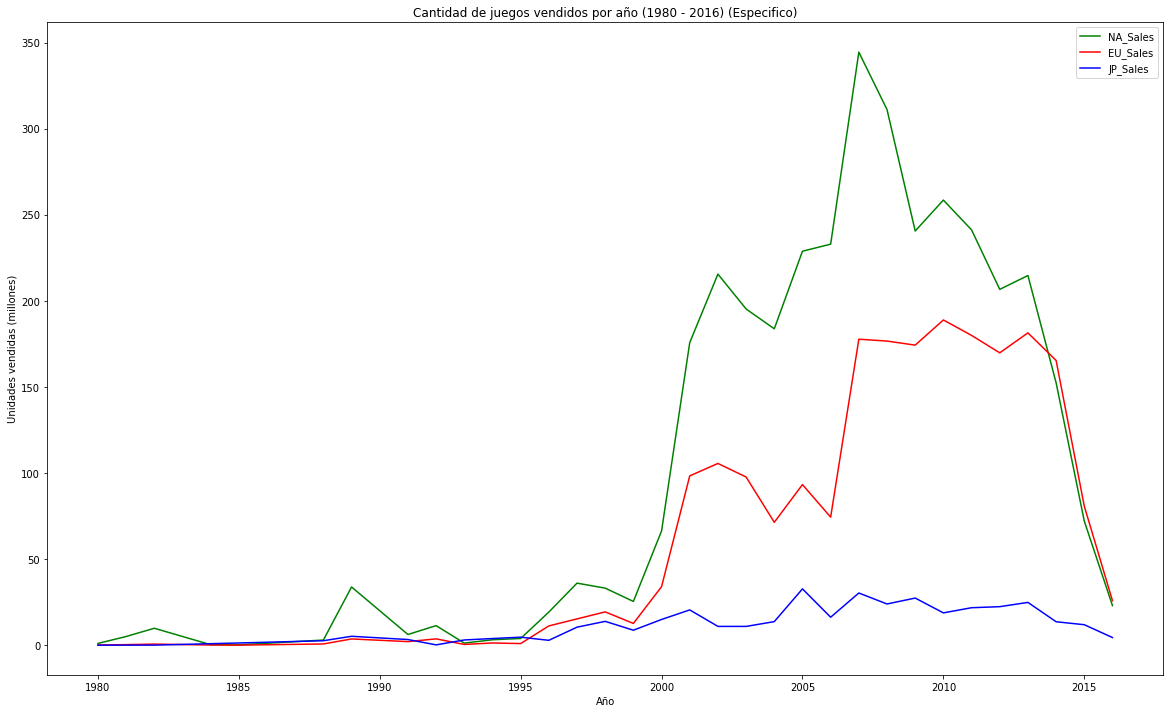

In [13]:
df_na = df_rank_sales.groupby(by="Year").agg({"NA_Sales":"sum"})
df_eu = df_rank_sales.groupby(by="Year").agg({"EU_Sales":"sum"})
df_jp = df_rank_sales.groupby(by="Year").agg({"JP_Sales":"sum"})


df_sales_years = df_rank_sales.groupby(by="Year").agg({"Global_Sales": "sum"})
fig, ax = plt.subplots(figsize=(20,12))
df_na.plot(ax = ax, xlabel="Año", ylabel = "Unidades vendidas (millones)", color="green")
df_eu.plot(ax = ax, xlabel="Año", ylabel = "Unidades vendidas (millones)", color="red")
df_jp.plot(ax = ax, xlabel="Año", ylabel = "Unidades vendidas (millones)", title= "Cantidad de juegos vendidos por año (1980 - 2016) (Especifico)", color="blue")

**CONCLUSIONES**

Global:

<AxesSubplot:title={'center':'Cantidad de juegos vendidos por año (1980 - 2016)'}, xlabel='Año', ylabel='Unidades vendidas (millones)'>

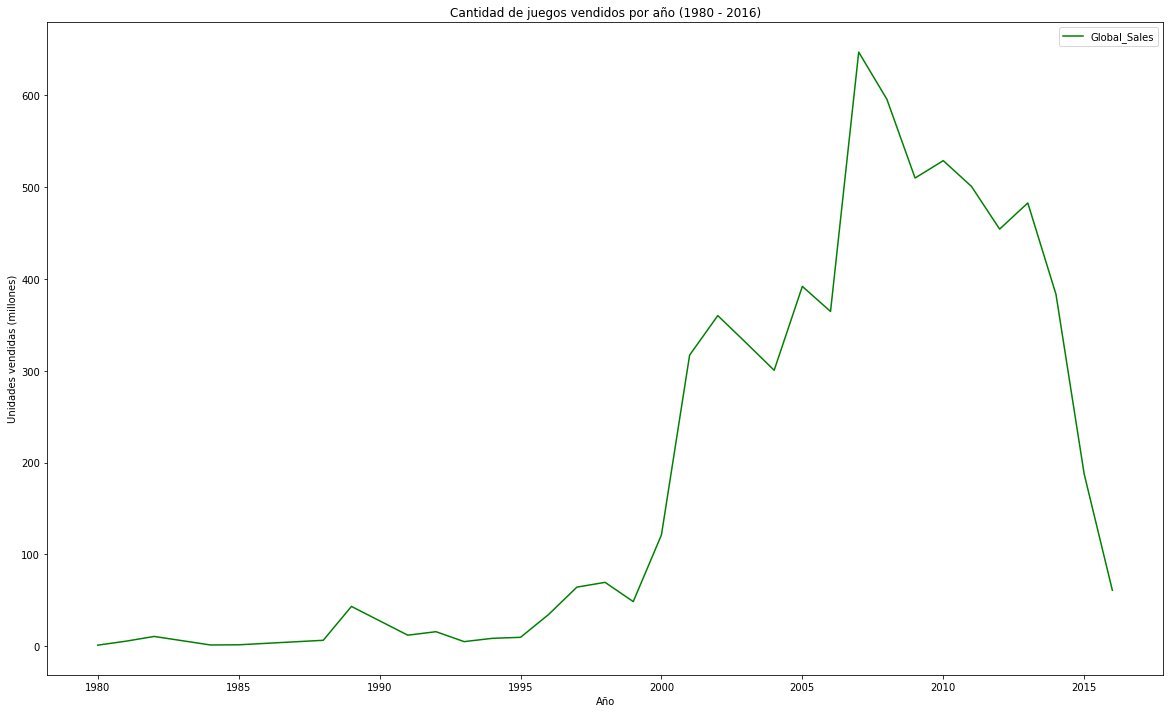

In [14]:
df_sales_years = df_rank_sales.groupby(by="Year").agg({"Global_Sales": "sum"})
fig, ax = plt.subplots(figsize=(20,12))
df_sales_years.plot(ax = ax, xlabel="Año", ylabel = "Unidades vendidas (millones)", title= "Cantidad de juegos vendidos por año (1980 - 2016)", color="green")

## Ventas por genero y plataforma de videojuego

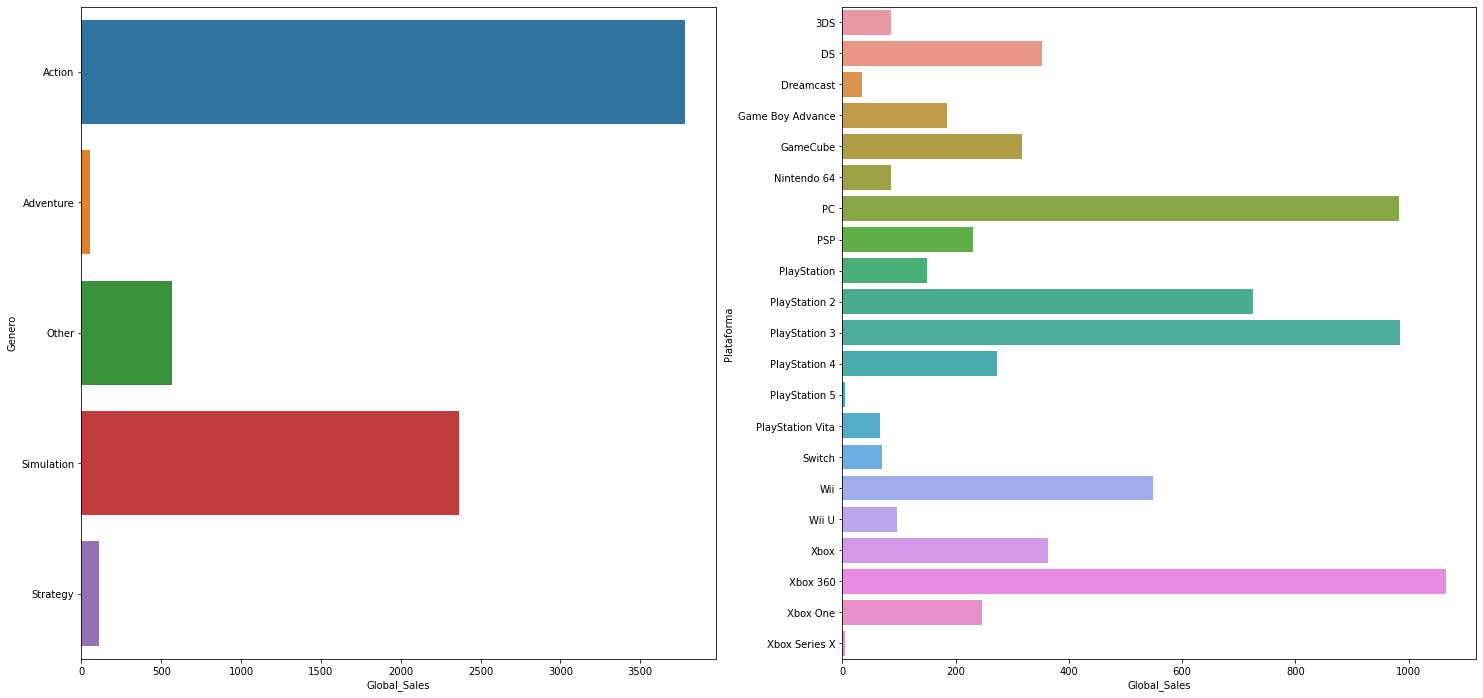

In [15]:
sales_genero = df_rank_sales.groupby(by="Genero", as_index=False).agg({"Global_Sales":"sum"})
sales_plataforma = df_rank_sales.groupby(by="Plataforma", as_index=False).agg({"Global_Sales":"sum"})

fig, (ax, ax2) = plt.subplots(1,2, figsize=(25,12))
sns.barplot(x="Global_Sales", y="Genero", data=sales_genero, ax=ax)
sns.barplot(x="Global_Sales", y="Plataforma", data=sales_plataforma, ax=ax2)
plt.show()

## Ventas por numero de jugadores y clasificacion de videojuego

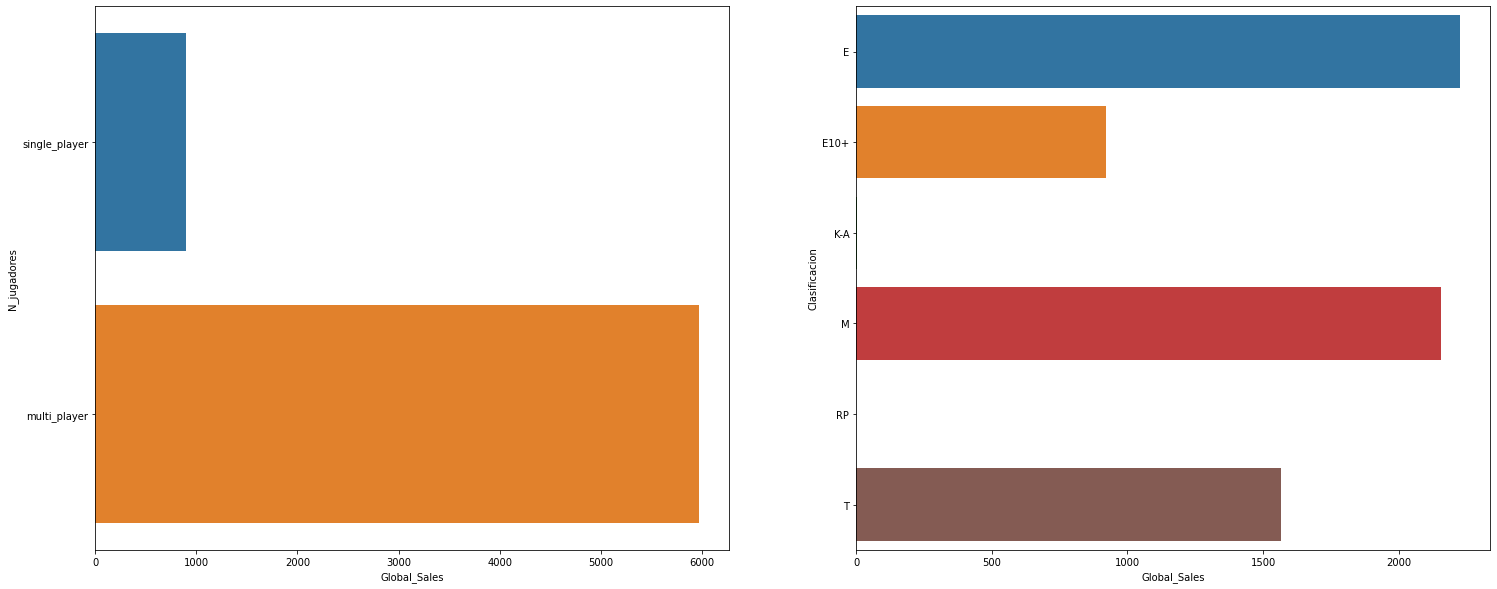

In [16]:
sales_jugadores = df_rank_sales.groupby(by="N_jugadores", as_index=False).agg({"Global_Sales":"sum"})
sales_clasificacion = df_rank_sales.groupby(by="Clasificacion", as_index=False).agg({"Global_Sales":"sum"})

fig, (ax, ax2) = plt.subplots(1,2, figsize=(25,10))
sns.barplot(x="Global_Sales", y="N_jugadores", data=sales_jugadores, ax=ax)
sns.barplot(x="Global_Sales", y="Clasificacion", data=sales_clasificacion, ax=ax2)
plt.show()

## Videojuegos que más juegos han vendido

<AxesSubplot:xlabel='Global_Sales', ylabel='Nombre'>

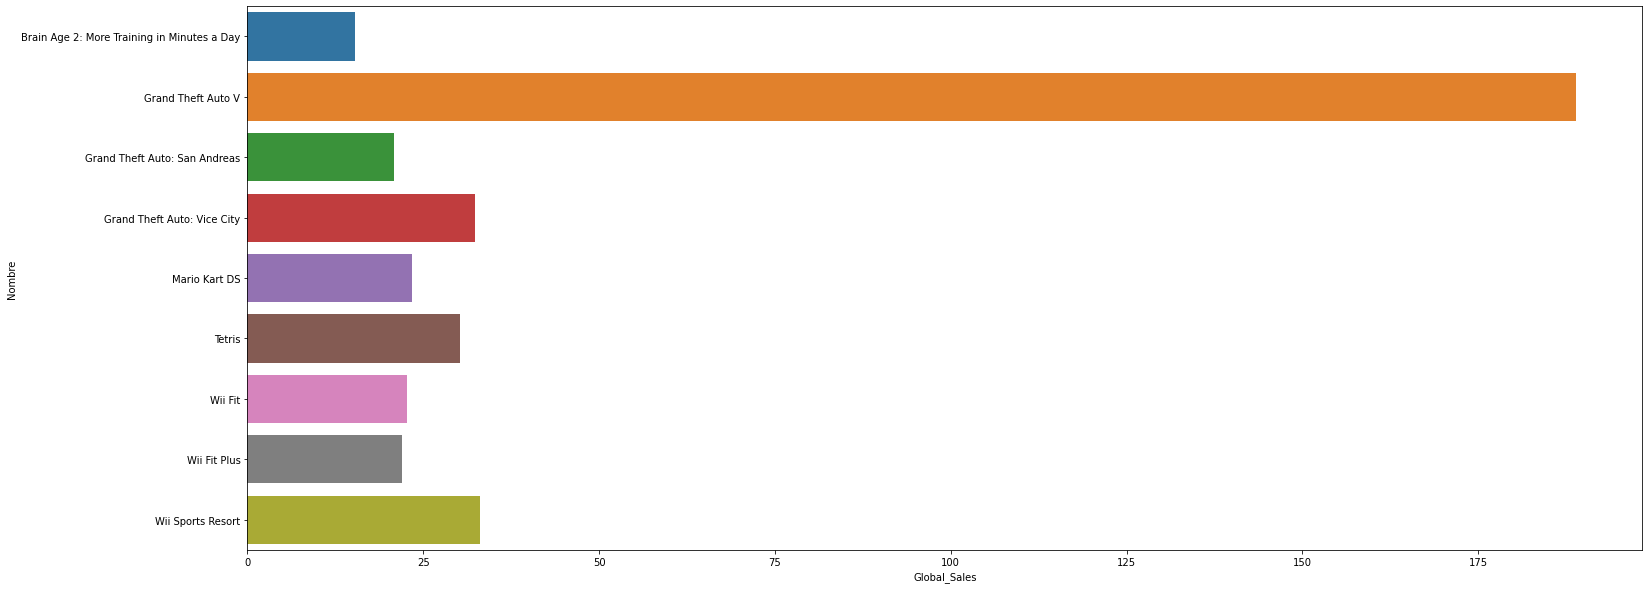

In [17]:
df_best_g = df_rank_sales[df_rank_sales["Global_Sales"]>15]
df_best_g2 = df_best_g.groupby(by="Nombre", as_index=False).agg({"Global_Sales": "sum"})
fig = plt.subplots(figsize=(25,10))
sns.barplot(x="Global_Sales", y="Nombre", data=df_best_g2)


## Desarrolladoras de videojuegos que más han vendido

<AxesSubplot:xlabel='Global_Sales', ylabel='Developer'>

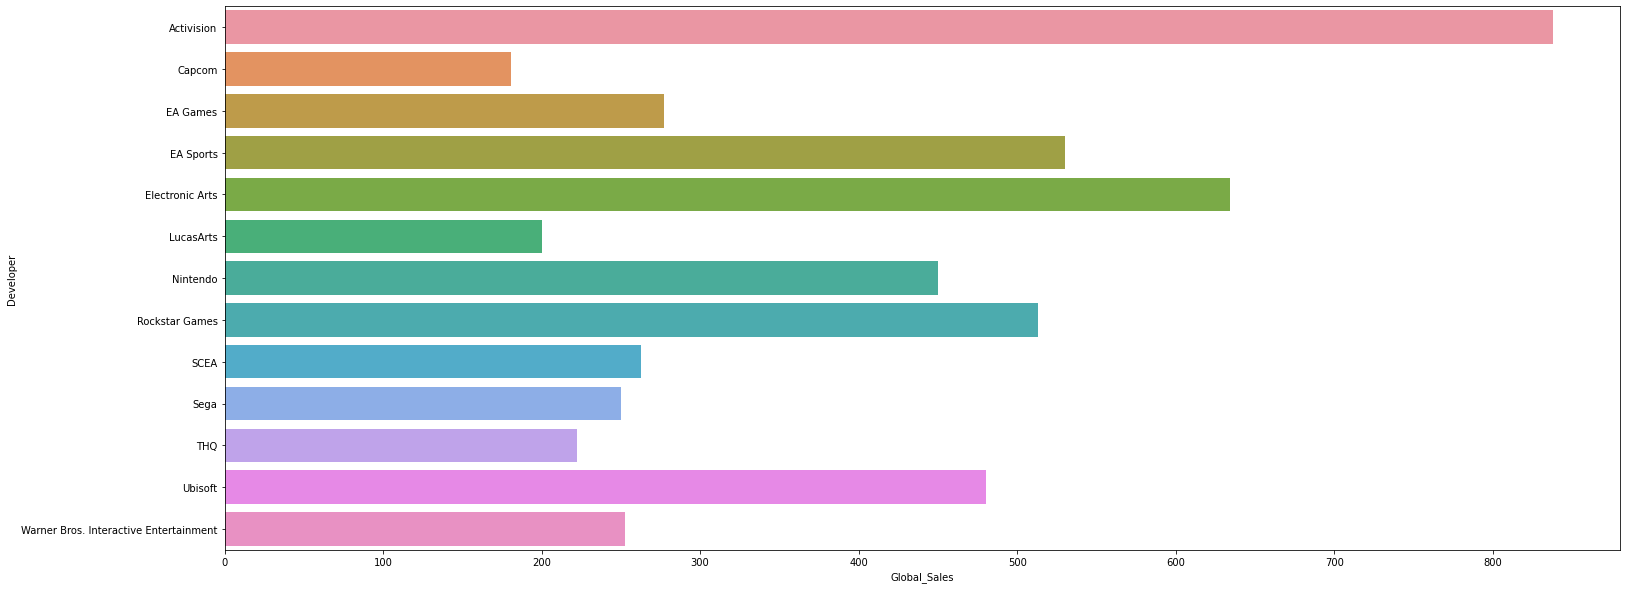

In [18]:
df_best_d = df_rank_sales.groupby(by="Developer", as_index=False).agg({"Global_Sales": "sum"})
df_best_d = df_best_d[df_best_d["Global_Sales"]> 160]
df_best_d
fig = plt.subplots(figsize=(25,10))
sns.barplot(x="Global_Sales", y="Developer", data=df_best_d)

**CONCLUSIONES**

## ¿Como se diferencian los ratings de los criticos con los del público?

Text(0.5, 1.0, 'Distribuvion de rating (Usuarios)')

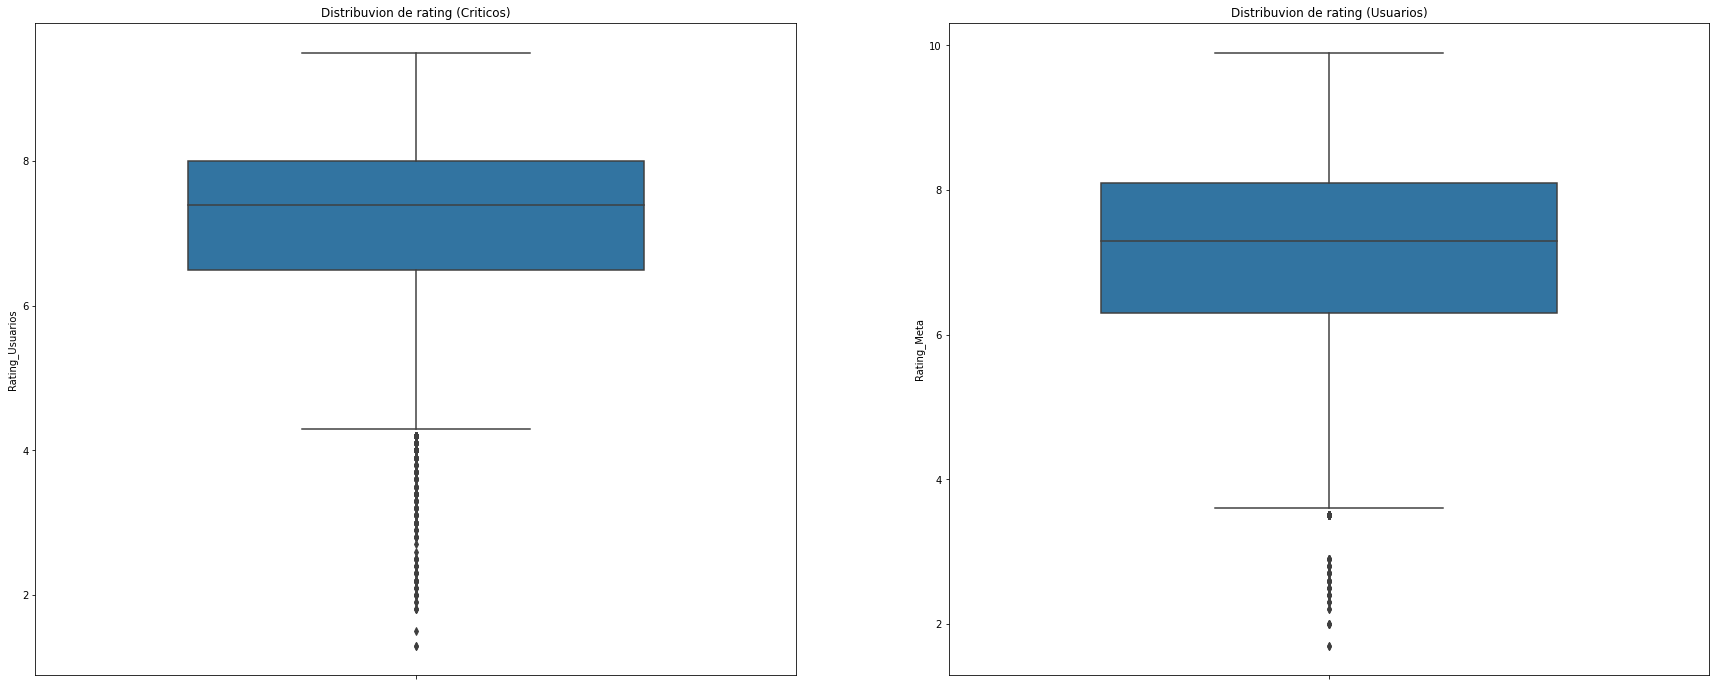

In [19]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(30,12))

sns.boxplot(data=df_rank_sales,y='Rating_Usuarios', width=0.6, ax=ax).set_title("Distribuvion de rating (Criticos)")
sns.boxplot(data=df_rank_sales,y='Rating_Meta', width=0.6, ax=ax2).set_title("Distribuvion de rating (Usuarios)")

## Ratings promedio por genero de videojuego

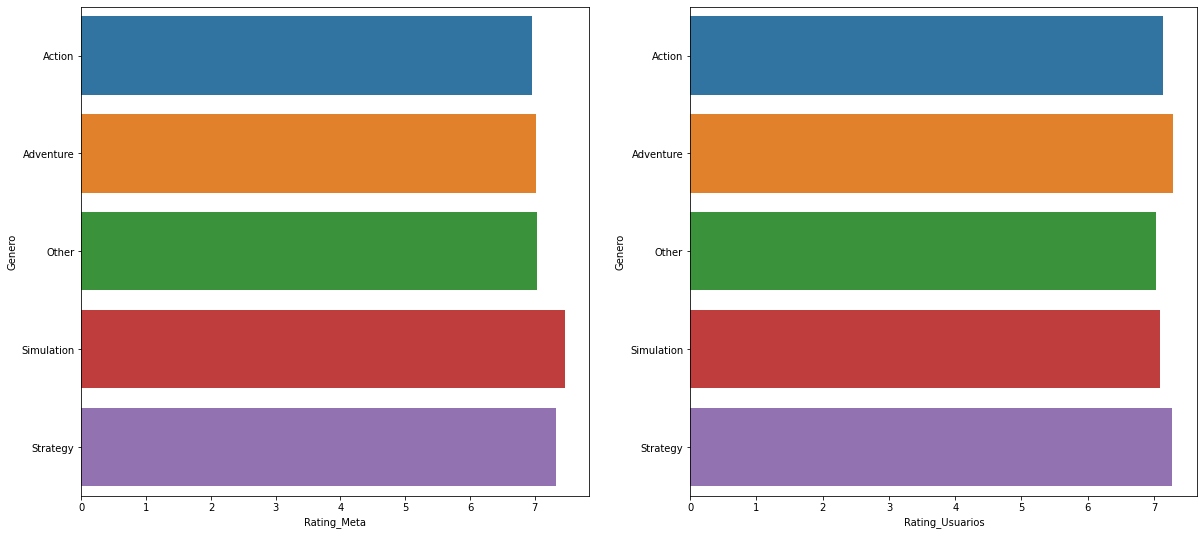

In [20]:
rank_genero = df_rank_sales.groupby(by="Genero", as_index=False).agg({"Rating_Meta":"mean", "Rating_Usuarios": "mean"})
fig, (ax, ax2) = plt.subplots(1,2, figsize=(20,9))
sns.barplot(x="Rating_Meta", y="Genero", data=rank_genero, ax=ax)
sns.barplot(x="Rating_Usuarios", y="Genero", data=rank_genero, ax=ax2)
rank_genero.head()
plt.show()

## Rating promedio por plataforma

,Genero,Rating_Meta,Rating_Usuarios
0,Action,6.957589,7.131324
1,Adventure,7.014815,7.290741
2,Other,7.041288,7.024811
3,Simulation,7.460315,7.082650
4,Strategy,7.322642,7.271429


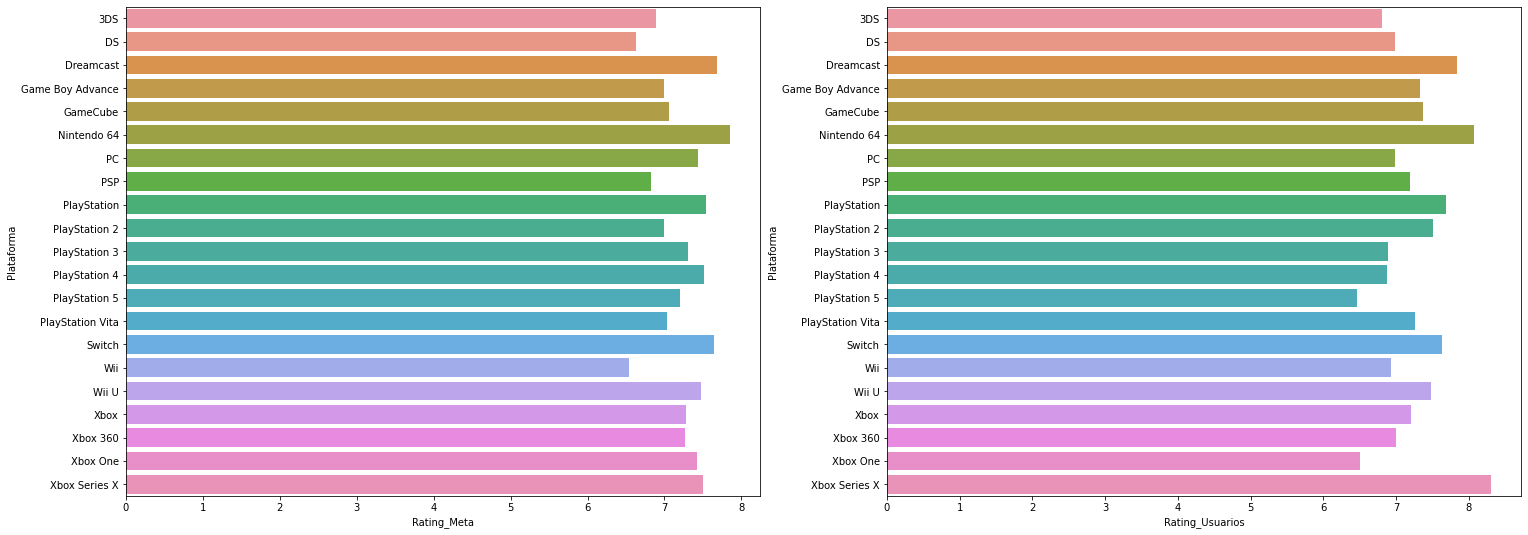

In [21]:
rank_platf = df_rank_sales.groupby(by="Plataforma", as_index=False).agg({"Rating_Meta":"mean", "Rating_Usuarios": "mean"})
fig, (ax, ax2) = plt.subplots(1,2, figsize=(25,9))
sns.barplot(x="Rating_Meta", y="Plataforma", data=rank_platf, ax=ax)
sns.barplot(x="Rating_Usuarios", y="Plataforma", data=rank_platf, ax=ax2)
rank_genero.head()

## Rating promedio por numero de jugadores

,Genero,Rating_Meta,Rating_Usuarios
0,Action,6.957589,7.131324
1,Adventure,7.014815,7.290741
2,Other,7.041288,7.024811
3,Simulation,7.460315,7.082650
4,Strategy,7.322642,7.271429


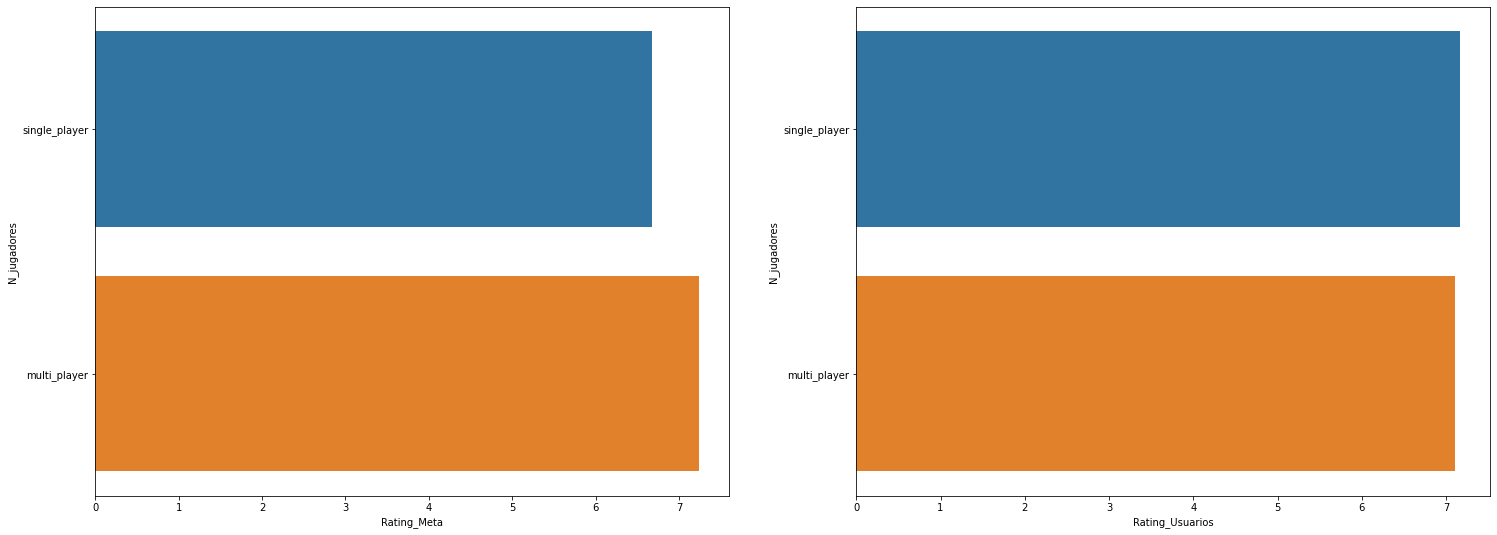

In [22]:
rank_jugadores = df_rank_sales.groupby(by="N_jugadores", as_index=False).agg({"Rating_Meta":"mean", "Rating_Usuarios": "mean"})
fig, (ax, ax2) = plt.subplots(1,2, figsize=(25,9))
sns.barplot(x="Rating_Meta", y="N_jugadores", data=rank_jugadores, ax=ax)
sns.barplot(x="Rating_Usuarios", y="N_jugadores", data=rank_jugadores, ax=ax2)
rank_genero.head()

In [26]:
df_rank_sales.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,2009,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort,8.0,8.3,Wii,Nintendo,2009-07-26,Simulation,Wii Sports Resort is a collection of fun sport...,multi_player,E
1,1989,23.20,2.26,4.22,0.58,30.26,Tetris,8.0,7.3,PlayStation 3,Electronic Arts,2011-01-04,Other,The first Tetris game for the PlayStation 3 wi...,multi_player,E
2,1988,2.97,0.69,1.81,0.11,5.58,Tetris,8.0,7.3,PlayStation 3,Electronic Arts,2011-01-04,Other,The first Tetris game for the PlayStation 3 wi...,multi_player,E
3,2005,9.81,7.57,4.13,1.92,23.42,Mario Kart DS,9.1,8.7,DS,Nintendo,2005-11-14,Simulation,Race and battle with up to eight karts at once...,multi_player,E
4,2007,8.94,8.03,3.60,2.15,22.72,Wii Fit,8.0,7.7,Wii,Nintendo,2008-05-19,Simulation,The active-play phenomenon started by Wii Spor...,single_player,E


## MODELO DE REGRESION

transformamos los datos categoricos a datos numericos para ser considerados en nuestro modelo

In [23]:
col = ["Plataforma", "Genero", "N_jugadores", "Clasificacion"]
for c in col:
    df_rank_sales[c] = df_rank_sales[c].cat.codes

ANALIZAMOS RELACIONES ENTRE VARIABLES:

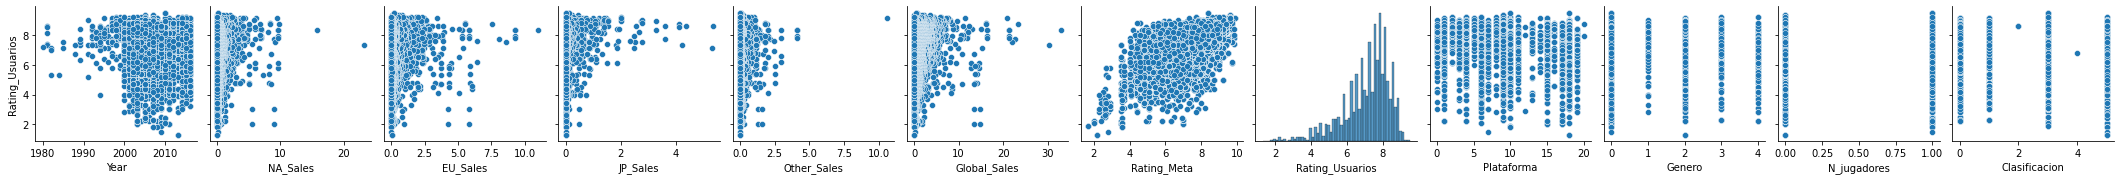

In [28]:
sns.pairplot(df_rank_sales,y_vars='Rating_Usuarios')

vemos la correlación lineal entre las variables con el rating de los usuarios. 

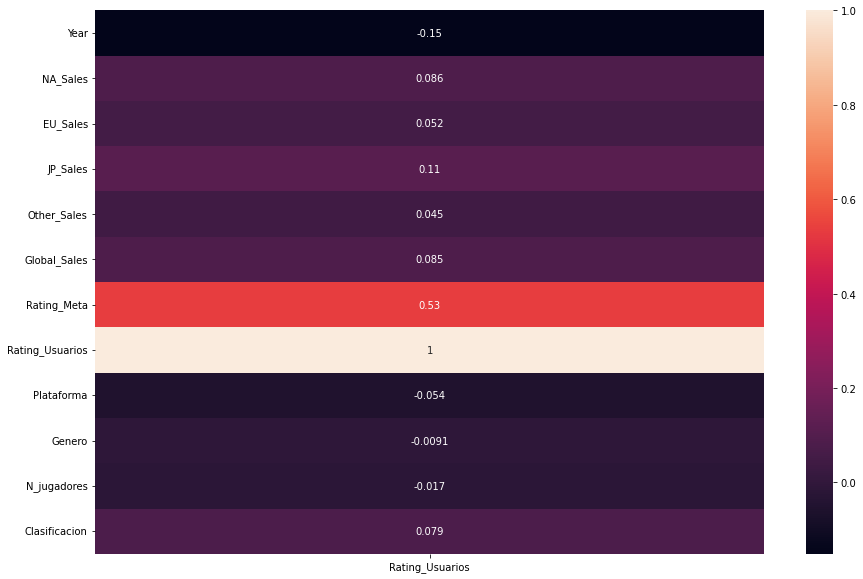

In [24]:
fig,  ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_rank_sales.corr()[["Rating_Usuarios"]], annot=True, ax=ax)
plt.show()

Entrenamos nuestro modelo de Regresión Lineal para los ratings de los usuarios

In [33]:
train_cols = df_rank_sales.columns.drop(["Year", "Rating_Usuarios", "Nombre", "Resumen", "Fecha", "Developer"])
X = df_rank_sales[train_cols]
y = df_rank_sales["Rating_Usuarios"]
X

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating_Meta,Plataforma,Genero,N_jugadores,Clasificacion
0,15.75,11.01,3.28,2.96,33.00,8.0,15,3,1,0
1,23.20,2.26,4.22,0.58,30.26,8.0,10,2,1,0
2,2.97,0.69,1.81,0.11,5.58,8.0,10,2,1,0
3,9.81,7.57,4.13,1.92,23.42,9.1,1,3,1,0
4,8.94,8.03,3.60,2.15,22.72,8.0,15,3,0,0
...,...,...,...,...,...,...,...,...,...,...
8874,0.00,0.01,0.00,0.00,0.01,7.0,6,4,1,1
8875,0.01,0.00,0.00,0.00,0.01,7.2,3,4,0,5
8876,0.00,0.01,0.00,0.00,0.01,8.1,14,0,1,0
8877,0.00,0.01,0.00,0.00,0.01,7.7,6,0,1,0


Conseguimos un buen ajuste de cuadrados, pero con pésimas métricas.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 0)
sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train = pd.DataFrame(scaled_train, columns=train_cols)
X_train

rl = LinearRegression() #CREAMOS LA REGRESION LINEAL
rl.fit(X_train, y_train) # ENTRENAMOS EL MODELO

# R2 de train
print(f"r2 train: {rl.score(X_train, y_train)}")

# R2 de test
print(f"r2 test: {rl.score(X_test,y_test)}")



r2 train: 0.3316300517601246
r2 test: 0.2728590732837043


C:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
def regression_results(y_true, y_pred, p):
    explained_variance=explained_variance_score(y_true, y_pred)
    mae=mean_absolute_error(y_true, y_pred) 
    mse=mean_squared_error(y_true, y_pred) 
    r2=r2_score(y_true, y_pred)

    n = y_true.shape[0]
    adjr2 = 1-(1-r2) * (n-1)/(n-p)

    print('Explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('adjr2: ', round(adjr2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(y_test, rl.predict(X_test), X_test.shape[1])

Explained_variance:  0.2733
r2:  0.2729
adjr2:  0.2703
MAE:  0.8164
MSE:  1.1749
RMSE:  1.0839


C:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Esto se puede apreciar claramente cuando graficamos algunos de los datos considerados en el modelo a través de su representación lineal en relación con el rating de los usuarios.

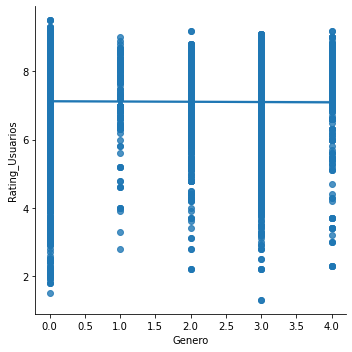

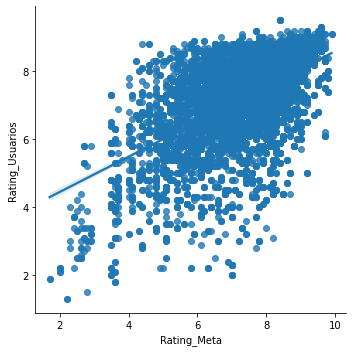

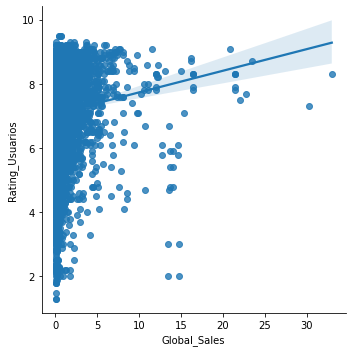

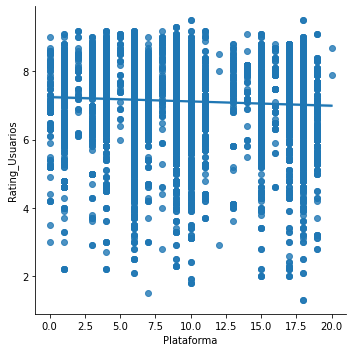

In [51]:
sns.lmplot(x="Genero", y="Rating_Usuarios", data=df_rank_sales)
sns.lmplot(x="Rating_Meta", y="Rating_Usuarios", data=df_rank_sales)
sns.lmplot(x="Global_Sales", y="Rating_Usuarios", data=df_rank_sales)
sns.lmplot(x="Plataforma", y="Rating_Usuarios", data=df_rank_sales)

MODELO 2

vemos la correlación lineal entre las variables con las ventas globales de los juegos. 

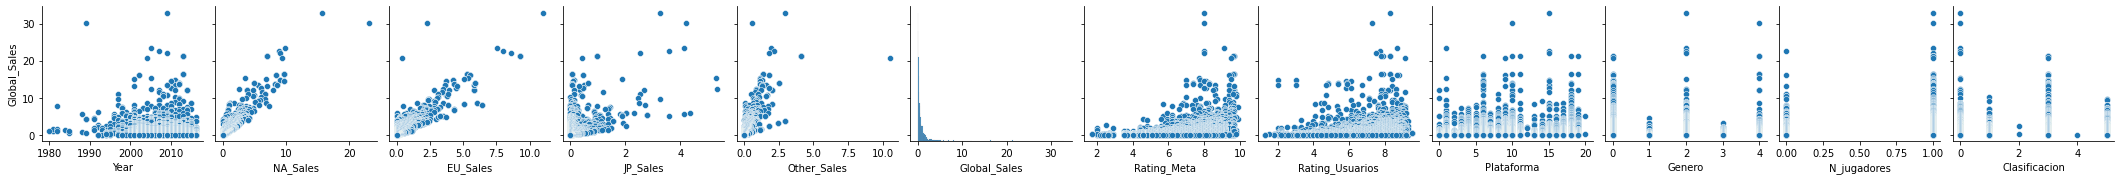

In [33]:
sns.pairplot(df_rank_sales,y_vars='Global_Sales')

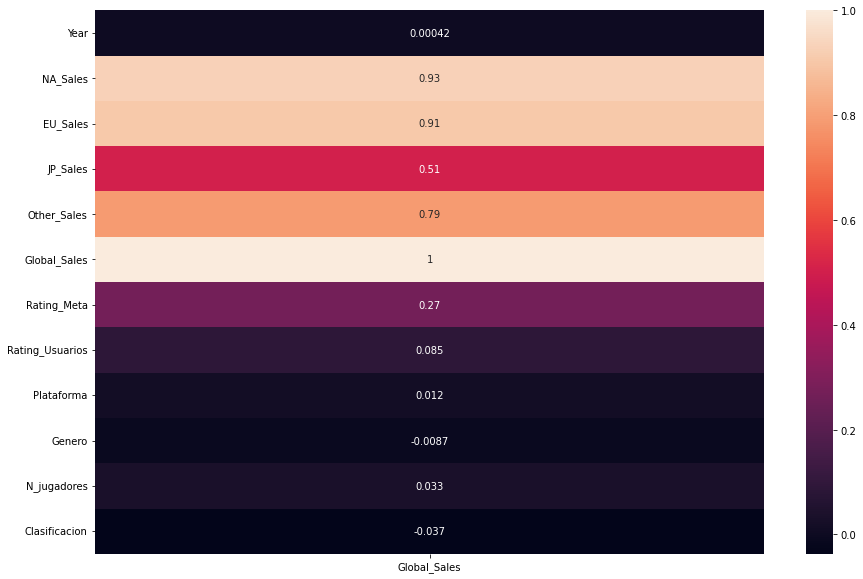

In [34]:
fig,  ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_rank_sales.corr()[["Global_Sales"]], annot=True, ax=ax)
plt.show()

In [72]:
train_cols = df_rank_sales.columns.drop(["Year", "Global_Sales", "Nombre", "Resumen", "Fecha", "Developer"])
X = df_rank_sales[train_cols]
y = df_rank_sales["Global_Sales"]
X

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Rating_Meta,Rating_Usuarios,Plataforma,Genero,N_jugadores,Clasificacion
0,15.75,11.01,3.28,2.96,8.0,8.3,15,3,1,0
1,23.20,2.26,4.22,0.58,8.0,7.3,10,2,1,0
2,2.97,0.69,1.81,0.11,8.0,7.3,10,2,1,0
3,9.81,7.57,4.13,1.92,9.1,8.7,1,3,1,0
4,8.94,8.03,3.60,2.15,8.0,7.7,15,3,0,0
...,...,...,...,...,...,...,...,...,...,...
8874,0.00,0.01,0.00,0.00,7.0,7.3,6,4,1,1
8875,0.01,0.00,0.00,0.00,7.2,6.7,3,4,0,5
8876,0.00,0.01,0.00,0.00,8.1,8.0,14,0,1,0
8877,0.00,0.01,0.00,0.00,7.7,7.8,6,0,1,0


Entrenamos nuestro modelo de Regresión Lineal para las ventas globales, donde obtenemos buenos resultados y buenas métricas de rendimiento. Esto se debe a que estamos considerando las columnas de las demás ventas, lo cual, resulta redundante en un modelo de predicción de ventas totales, ya que es obvio que las ventas de otros países tienen relación con las ventas totales globales.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 0)
sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train = pd.DataFrame(scaled_train, columns=train_cols)
X_train

rl = LinearRegression() #CREAMOS LA REGRESION LINEAL
rl.fit(X_train, y_train) # ENTRENAMOS EL MODELO

# R2 de train
print(f"r2 train: {rl.score(X_train, y_train)}")

# R2 de test
print(f"r2 test: {rl.score(X_test,y_test)}")

regression_results(y_test, rl.predict(X_test), X_test.shape[1])

r2 train: 0.9999873350374213
r2 test: 0.9965407764880445
Explained_variance:  0.9965
r2:  0.9965
adjr2:  0.9965
MAE:  0.037
MSE:  0.0092
RMSE:  0.0958


C:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


volvemos a realizar el mismo proceso ahora sin los datos sobreinfluyentes.

In [74]:
train_cols = df_rank_sales.columns.drop(["Year", "Global_Sales", "NA_Sales", "EU_Sales", "Nombre",
                                         "Resumen", "JP_Sales", "Other_Sales", "Fecha", "Developer"])
X = df_rank_sales[train_cols]
y = df_rank_sales["Global_Sales"]
X

,Rating_Meta,Rating_Usuarios,Plataforma,Genero,N_jugadores,Clasificacion
0,8.0,8.3,15,3,1,0
1,8.0,7.3,10,2,1,0
2,8.0,7.3,10,2,1,0
3,9.1,8.7,1,3,1,0
4,8.0,7.7,15,3,0,0
...,...,...,...,...,...,...
8874,7.0,7.3,6,4,1,1
8875,7.2,6.7,3,4,0,5
8876,8.1,8.0,14,0,1,0
8877,7.7,7.8,6,0,1,0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 0)
sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train = pd.DataFrame(scaled_train, columns=train_cols)
X_train

rl = LinearRegression() #CREAMOS LA REGRESION LINEAL
rl.fit(X_train, y_train) # ENTRENAMOS EL MODELO

# R2 de train
print(f"r2 train: {rl.score(X_train, y_train)}")

# R2 de test
print(f"r2 test: {rl.score(X_test,y_test)}")

regression_results(y_test, rl.predict(X_test), X_test.shape[1])

r2 train: 0.08180131388805678
r2 test: 0.09048217902971445
Explained_variance:  0.0905
r2:  0.0905
adjr2:  0.0887
MAE:  0.7616
MSE:  2.4114
RMSE:  1.5529


C:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
